# Data Modeling and Analysis

This Notebook will model the data and gather insights. This will include:
- Data Exploration
- Data Visualization
- Conclusions


Notes to self:



## Import Data

In [51]:
## Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

## NLTK
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

## WordCloud
from wordcloud import WordCloud


#Ignore warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [11]:
df = pd.read_csv('../3_ANALYSIS/data/processed_data.csv')

print(df.shape)
df.head()

(2727, 73)


,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
0,Army,This was a convo I had with one of my buddies ...,If you could create a new MRE based on a Fast ...,[],r/army,0.673935,-0.263955,-0.263955,0,1,...,0,1,0,0,0,0,0,0,23,5
1,Army,BLUF: how do you overcome imposter syndrome?\n...,how do you even Army?,[],r/army,-1.607424,-0.290761,-0.290761,0,1,...,0,1,0,0,0,0,0,0,23,5
2,Army,"Long story short, my estranged (soon to be ex)...",Command Directed No-Contact Order?,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,23,5
3,Army,"\nMy husband is 35T, and just graduated AIT. W...",Anyone 35T?,[],r/army,-0.174943,-0.250552,-0.250552,0,1,...,0,1,0,0,0,0,0,0,22,5
4,Army,I could use some advice on going recruiting. I...,Thinking of going recruiter as brand new E5,[],r/army,0.673935,-0.277358,-0.277358,0,1,...,0,1,0,0,0,0,0,0,22,5


In [12]:
mh_df = df[df['subreddit'].isin(['schizophrenia', 'bipolar'])]

mh_df.head()

,subreddit,selftext,title,link_flair_richtext,subreddit_name_prefixed,upvote_ratio,ups,score,edited,is_self,...,domain_self.USMC,domain_self.army,domain_self.bipolar,domain_self.schizophrenia,domain_stripes.com,domain_v.redd.it,domain_youtu.be,domain_youtube.com,hour_of_day,day_of_week
1395,schizophrenia,I think I'm in danger of actually hurting some...,I think I'm going to lose it,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,1,...,0,0,0,1,0,0,0,0,2,0
1396,schizophrenia,Holidays blow. Brain blows. Got money saved up...,Taking the jump.,[],r/schizophrenia,0.673935,-0.277358,-0.277358,0,1,...,0,0,0,1,0,0,0,0,2,0
1397,schizophrenia,"Hope you’re all having happy, stress free, hol...",Happy Selfie-Sunday!,[],r/schizophrenia,0.673935,-0.263955,-0.263955,0,0,...,0,0,0,0,0,0,0,0,2,0
1398,schizophrenia,This is my first time posting here. I’ve been ...,Merry Christmas and don’t forget to thank your...,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,0,...,0,0,0,0,0,0,0,0,0,0
1399,schizophrenia,I noticed development of my symptoms today but...,Selfie Sunday,[],r/schizophrenia,0.673935,-0.290761,-0.290761,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#Downloading NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/kyerafrancis/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
def preprocess_text(text):
    '''
    This function is performing text cleaning in order to prepare the text for NLP analysis.
    This includes:
    - Lowercasing
    - Removing special characters and digits
    - Tokenizing into words
    - Removing stopwords
    - Lemmatization
    
    Returns: Cleaned text
    
    '''
    # Lowercasing
    text = text.lower()
    # Remove special characters and digits
    text = re.sub("(\\d|\\W)+", " ", text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words("english", "ascii"))
    words = [word for word in words if word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)


In [15]:
def prepare_data_for_nlp(df, text_column='selftext', target_column='subreddit'):
    ''' 
    This function is performing text preprocessing and vectorization for NLP analysis.
    
    Parameters:
    - df: dataframe
    - text_column: column containing text data
    - target_column: column containing target variable
    
    
    Returns: X_train_vect, X_test_vect, y_train, y_test, vectorizer
    '''
    # Preprocess text data
    df[text_column] = df[text_column].apply(lambda x: preprocess_text(str(x)))

    # Split dataset into features and target variable
    X = df[text_column]
    y = df[target_column]

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Vectorization - using TF-IDF
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train_vect = vectorizer.fit_transform(X_train)
    X_test_vect = vectorizer.transform(X_test)

    return X_train_vect, X_test_vect, y_train, y_test, vectorizer

In [16]:
X_train, X_test, y_train, y_test, vectorizer = prepare_data_for_nlp(mh_df)

## Reviewing Aggregate Word Cloud

In [17]:
tdidf_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
print(tdidf_df)

       _f   _h  _ia  _qbdc  _zs   aa  aaaaaaaaaaaaa  aaaaaaand  aaaahhhh   ab  \
0     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
2     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
3     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
4     0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
...   ...  ...  ...    ...  ...  ...            ...        ...       ...  ...   
1060  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1061  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1062  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1063  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   
1064  0.0  0.0  0.0    0.0  0.0  0.0            0.0        0.0       0.0  0.0   

      ...  zipper  zmj  zol

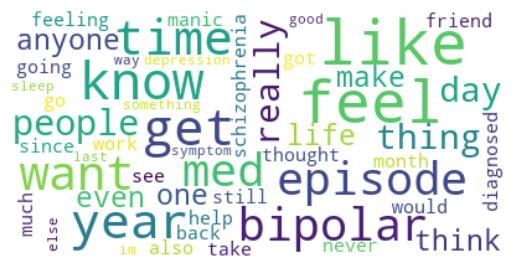

In [18]:
# Sum the TF-IDF scores for each word
word_frequencies = tdidf_df.sum(axis=0).to_dict()

# Generate WordCloud
wordcloud = WordCloud(background_color='white', max_words=50, max_font_size=50, random_state=42).generate_from_frequencies(word_frequencies)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Training for Logistical Regression Model

In [19]:
# Initialize the model
lrg = LogisticRegression()

# Train the model
lrg.fit(X_train, y_train)


LogisticRegression()

               precision    recall  f1-score   support

      bipolar       0.78      0.88      0.83       150
schizophrenia       0.82      0.68      0.74       117

     accuracy                           0.79       267
    macro avg       0.80      0.78      0.79       267
 weighted avg       0.80      0.79      0.79       267



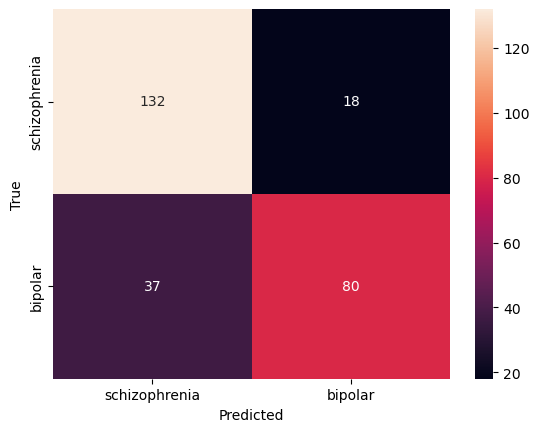

In [21]:
# Make predictions on the test set
y_pred_lr = lrg.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_lr)) #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html

# Plot confusion matrix
cm_lrg = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lrg,
            annot=True,
            fmt='d',
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [22]:
# Define parameter grid for GridSearch
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'penalty': ['l2', 'elasticnet', None],
    'max_iter': [100, 200, 300],
    'class_weight': ['balanced', None],
    'random_state': [42],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'n_jobs': [-1]}

# Initialize Grid Search
grid_search = GridSearchCV(LogisticRegression(),
                           param_grid,
                           cv=5)

# Fit the model
grid_search.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model = grid_search.best_estimator_
y_pred_best_lr = best_model.predict(X_test)


/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/kyerafrancis/anaconda3/envs/dsi/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules

C                       0.1
class_weight       balanced
max_iter                100
multi_class     multinomial
n_jobs                   -1
penalty                None
random_state             42
solver                lbfgs
dtype: object

               precision    recall  f1-score   support

      bipolar       0.82      0.87      0.84       150
schizophrenia       0.82      0.76      0.79       117

     accuracy                           0.82       267
    macro avg       0.82      0.81      0.82       267
 weighted avg       0.82      0.82      0.82       267



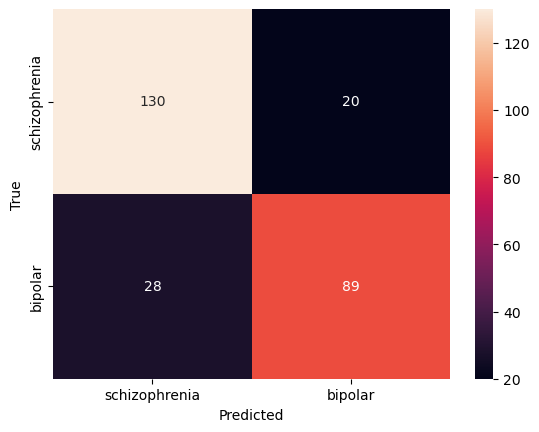

In [23]:
# Print best parameters
print(pd.Series(grid_search.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_lr))

# Plot confusion matrix
cm_lrg_best = confusion_matrix(y_test, y_pred_best_lr)
sns.heatmap(cm_lrg_best,
            annot=True,
            fmt='d', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
# Variables 
feature_names = vectorizer.get_feature_names_out()
coefficients = lrg.coef_[0] #Becuase this is a binary classification problem, there are only 2 classes. Therefore, we only need to look at the first row of coefficients.

for _, class_label in enumerate(lrg.classes_): #Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
    sorted_indices = np.argsort(coefficients)

    top_positive_words = [feature_names[i] for i in sorted_indices[-20:]]
    top_negative_words = [feature_names[i] for i in sorted_indices[:20]]

    print(f"Class: {class_label}")
    print("Top Positive Influential Words:", top_positive_words)
    print("Top Negative Influential Words:", top_negative_words)
    print()

Class: bipolar
Top Positive Influential Words: ['please', 'abilify', 'name', 'real', 'invega', 'hearing', 'negative', 'away', 'see', 'people', 'doctor', 'hear', 'paranoid', 'symptom', 'psychosis', 'schizophrenic', 'delusion', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'feel', 'last', 'never', 'feeling', 'anyone', 'mood', 'hypomanic', 'depression', 'med', 'depressed', 'holiday', 'week', 'depressive', 'ever', 'need', 'relationship']

Class: schizophrenia
Top Positive Influential Words: ['please', 'abilify', 'name', 'real', 'invega', 'hearing', 'negative', 'away', 'see', 'people', 'doctor', 'hear', 'paranoid', 'symptom', 'psychosis', 'schizophrenic', 'delusion', 'hallucination', 'voice', 'schizophrenia']
Top Negative Influential Words: ['bipolar', 'manic', 'episode', 'mania', 'feel', 'last', 'never', 'feeling', 'anyone', 'mood', 'hypomanic', 'depression', 'med', 'depressed', 'holiday', 'week', 'depressive', 'ever', '

### Word Clouds for Positive and Negative Posts

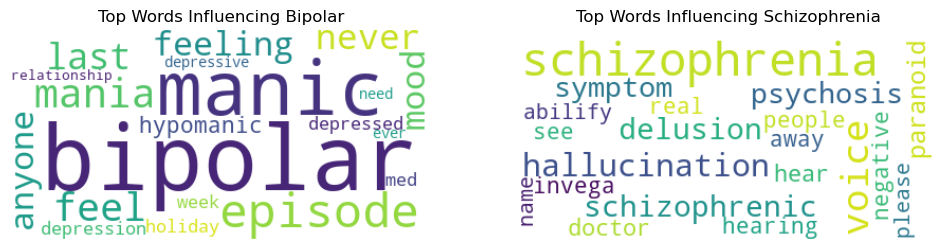

In [28]:
# For Class A (Positive Coefficients)
top_words_schizo = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[-20:]}

# For Class B (Negative Coefficients)
top_words_bipolar = {feature_names[i]: abs(coefficients[i]) for i in sorted_indices[:20]}

# Word Cloud for Class A
wordcloud_bipolar = WordCloud(background_color='white').generate_from_frequencies(top_words_bipolar)

# Word Cloud for Class B
wordcloud_schizo = WordCloud(background_color='white').generate_from_frequencies(top_words_schizo)

# Display Word Clouds
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_bipolar, interpolation='bilinear')
plt.title('Top Words Influencing Bipolar')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_schizo, interpolation='bilinear')
plt.title('Top Words Influencing Schizophrenia')
plt.axis("off")

plt.show()

## Training for Naive Bayes Regression Model

In [30]:
# Initialize and train the Multinomial Naive Bayes model
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

               precision    recall  f1-score   support

      bipolar       0.63      0.97      0.76       150
schizophrenia       0.86      0.26      0.41       117

     accuracy                           0.66       267
    macro avg       0.74      0.62      0.58       267
 weighted avg       0.73      0.66      0.61       267



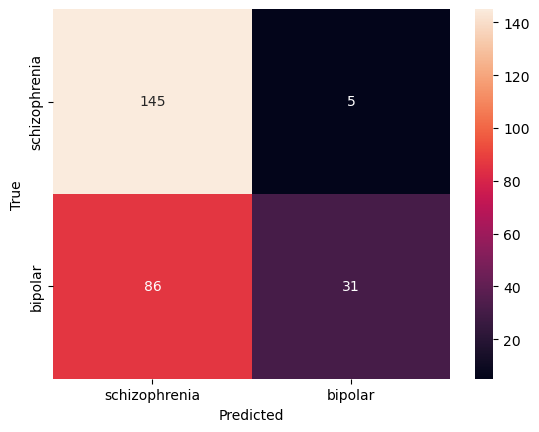

In [31]:
# Predict on the test set
y_pred_mnb = mnb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_mnb))

# Plot the confusion matrix
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
sns.heatmap(cm_mnb, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
# Define a parameter grid for GridSearch
param_grid_mnb = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.3, 0.7], [0.7, 0.3]],
    }

# Initialize and perform the grid search
grid_search_mnb = GridSearchCV(MultinomialNB(), param_grid = param_grid_mnb, cv=5)
grid_search_mnb.fit(X_train, y_train)



# Re-evaluate using the best model
best_model = grid_search_mnb.best_estimator_
y_pred_best_mnb = best_model.predict(X_test)


Best Parameters:  {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': -1, 'penalty': None, 'random_state': 42, 'solver': 'lbfgs'}
               precision    recall  f1-score   support

      bipolar       0.71      0.85      0.77       150
schizophrenia       0.74      0.56      0.63       117

     accuracy                           0.72       267
    macro avg       0.72      0.70      0.70       267
 weighted avg       0.72      0.72      0.71       267



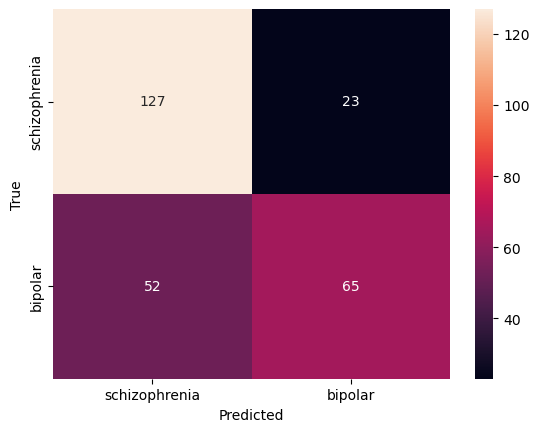

In [33]:
# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

#Print classification report
print(classification_report(y_test, y_pred_best_mnb))

# Plot the confusion matrix
cm_mnb_best = confusion_matrix(y_test, y_pred_best_mnb)
sns.heatmap(cm_mnb_best,
            annot=True,
            fmt='d',
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [34]:
# Variables 

log_prob = mnb.feature_log_prob_ #There are no coefficients in Multinomial Naive Bayes, instead we have log probabilities

for _, class_label in enumerate(mnb.classes_):
    class_log_probabilities = log_prob[_]
    sorted_indices = np.argsort(class_log_probabilities)

    top_words = [feature_names[i] for i in sorted_indices[-20:]]  # Top 20 words

    print(f"Class: {class_label}")
    print("Top Influential Words:", top_words)
    print()

Class: bipolar
Top Influential Words: ['going', 'feeling', 'one', 'even', 'really', 'thing', 'life', 'anyone', 'day', 'manic', 'want', 'med', 'time', 'know', 'get', 'year', 'episode', 'bipolar', 'like', 'feel']

Class: schizophrenia
Top Influential Words: ['see', 'one', 'help', 'go', 'think', 'thought', 'really', 'make', 'symptom', 'thing', 'year', 'want', 'get', 'time', 'voice', 'know', 'people', 'feel', 'schizophrenia', 'like']



## Training for Random Forest Classifier Model

In [35]:
# Train the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

               precision    recall  f1-score   support

      bipolar       0.82      0.93      0.87       150
schizophrenia       0.89      0.74      0.80       117

     accuracy                           0.84       267
    macro avg       0.85      0.83      0.84       267
 weighted avg       0.85      0.84      0.84       267



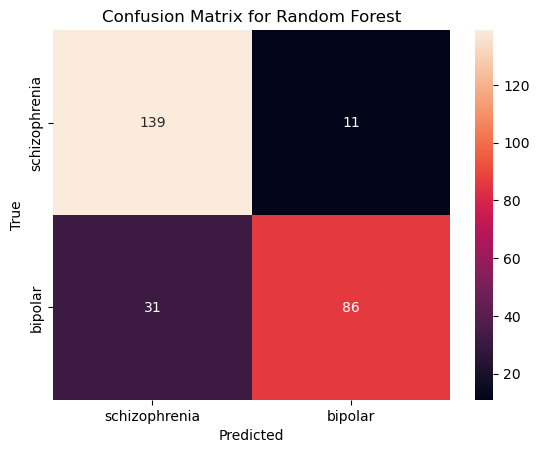

In [37]:
# Make predictions
y_pred_rf = rf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_rf))

# Confusion matrix for Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
importances = rf.feature_importances_
indices = np.argsort(importances)[-20:]  # Top 20 features (Not separated by class)

top_features = [(feature_names[i], importances[i]) for i in indices]
print("Top Features and Words:")
for feature, importance in top_features:
    print(f"{feature}: {importance}")

Top Features and Words:
get: 0.005065176236569786
want: 0.005088358367723358
psychosis: 0.005199808684442665
since: 0.005215354411313548
year: 0.00539744546094102
delusion: 0.00542568233486012
med: 0.005454871189368839
depression: 0.005533173612082481
hallucination: 0.005542645848669836
need: 0.0057163084997945614
anyone: 0.005758972016702384
schizophrenic: 0.006658477274212165
last: 0.006750191573142506
mania: 0.008417981861377212
feel: 0.010762657870869694
episode: 0.012579999822749892
voice: 0.014708938681366522
manic: 0.022074133061932285
bipolar: 0.030188538238445282
schizophrenia: 0.03160290274170217


In [39]:
# Define parameter grid for GridSearch
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search
grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_model_rf.predict(X_test)

max_depth              NaN
min_samples_leaf       1.0
min_samples_split     10.0
n_estimators         200.0
dtype: float64

               precision    recall  f1-score   support

      bipolar       0.77      0.91      0.84       150
schizophrenia       0.86      0.66      0.74       117

     accuracy                           0.80       267
    macro avg       0.81      0.79      0.79       267
 weighted avg       0.81      0.80      0.80       267



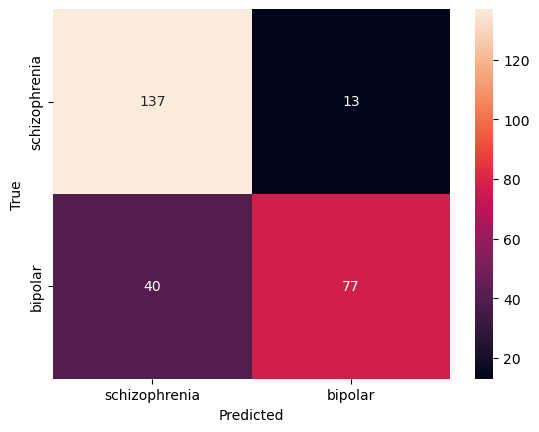

In [40]:
# Print best parameters
print(pd.Series(grid_search_rf.best_params_))
print()
# Print classification report
print(classification_report(y_test, y_pred_best_rf))

# Plot confusion matrix
cm_rf_best = confusion_matrix(y_test, y_pred_best_rf)
sns.heatmap(cm_rf_best,
            annot=True,
            fmt='d', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for KNN Model

In [41]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

               precision    recall  f1-score   support

      bipolar       0.00      0.00      0.00       150
schizophrenia       0.44      1.00      0.61       117

     accuracy                           0.44       267
    macro avg       0.22      0.50      0.30       267
 weighted avg       0.19      0.44      0.27       267



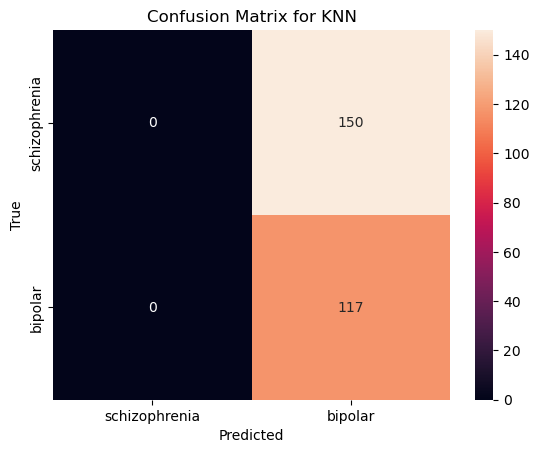

In [42]:

# Make predictions
y_pred_knn = knn.predict(X_test) 

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Confusion matrix for KNN
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

As you can see if we process the KNN the same way as the other models, we get a very low accuracy score. This is because the KNN model is very sensitive to the scale of the data. We will need to scale the data before we can run the model.

In [49]:
# Scale the features
scaler = StandardScaler(with_mean=False)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN model with GridSearch for parameter tuning
knn_params = {
    'n_neighbors': np.arange(1, 25),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_scaled = KNeighborsClassifier()
grid_search_knn = GridSearchCV(knn_scaled, knn_params, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)

# Best KNN model
best_knn = grid_search.best_estimator_

metric         euclidean
n_neighbors            1
weights          uniform
dtype: object

Classification Report:
               precision    recall  f1-score   support

      bipolar       0.83      0.03      0.06       150
schizophrenia       0.44      0.99      0.61       117

     accuracy                           0.45       267
    macro avg       0.64      0.51      0.34       267
 weighted avg       0.66      0.45      0.30       267

Accuracy: 0.45318352059925093


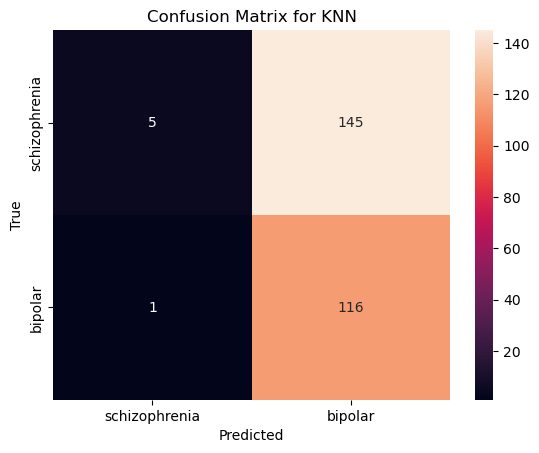

In [50]:

# Make predictions
y_pred_knn = best_knn.predict(X_test_scaled)

# Print best parameters
print(pd.Series(grid_search_knn.best_params_))
print()

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

# Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm_knn, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for KNN')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Training for Gradient Boosting Model

In [52]:
# Initialize and train the Gradient Boosting model
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

               precision    recall  f1-score   support

      bipolar       0.83      0.82      0.82       150
schizophrenia       0.77      0.78      0.77       117

     accuracy                           0.80       267
    macro avg       0.80      0.80      0.80       267
 weighted avg       0.80      0.80      0.80       267



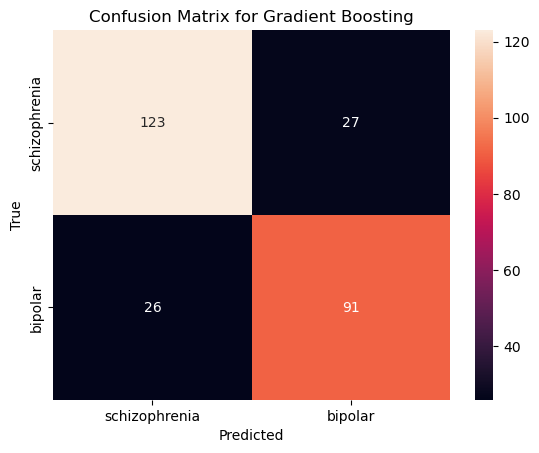

In [54]:
# Make predictions
y_pred_gb = gb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred_gb))

# Confusion matrix for Gradient Boosting
cm_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm_gb, annot=True, fmt='d', xticklabels=['schizophrenia', 'bipolar'], yticklabels=['schizophrenia', 'bipolar'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [55]:
# Variables

importances_gb = gb.feature_importances_
indices_gb = np.argsort(importances_gb)[-20:]  # Top 20 features

top_features_gb = [(feature_names[i], importances_gb[i]) for i in indices_gb]
print("Top Features and Words for Gradient Boosting:")
for feature, importance in top_features_gb:
    print(f"{feature}: {importance}")

Top Features and Words for Gradient Boosting:
year: 0.005669697767668585
mood: 0.006243967825632801
holiday: 0.006537741641110694
delusion: 0.00690447706164331
mostly: 0.007125479873476165
psychosis: 0.007178711259223761
schizo: 0.007674675190093674
mania: 0.008175974028422387
never: 0.008686565563113844
feeling: 0.009358155738911572
hallucination: 0.009682914997718827
anyone: 0.009702249142946415
med: 0.010796802855041426
feel: 0.027439053190265898
episode: 0.028721024478112745
schizophrenic: 0.03595162051057636
voice: 0.07227173446565813
manic: 0.08084796689388318
bipolar: 0.19552571645577674
schizophrenia: 0.23769831939032396


In [56]:
# Define parameter grid for GridSearch
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize Grid Search
grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid_gb, cv=5)
grid_search_gb.fit(X_train, y_train)

# Re-evaluate with the best parameters
best_model_gb = grid_search_gb.best_estimator_
y_pred_best_gb = best_model_gb.predict(X_test)

Best Parameters for Gradient Boosting:
learning_rate          0.1
max_depth              3.0
min_samples_leaf       1.0
min_samples_split      2.0
n_estimators         100.0
dtype: float64

Classification Report for Best Gradient Boosting Model:
               precision    recall  f1-score   support

      bipolar       0.85      0.82      0.83       150
schizophrenia       0.78      0.81      0.79       117

     accuracy                           0.82       267
    macro avg       0.81      0.82      0.81       267
 weighted avg       0.82      0.82      0.82       267



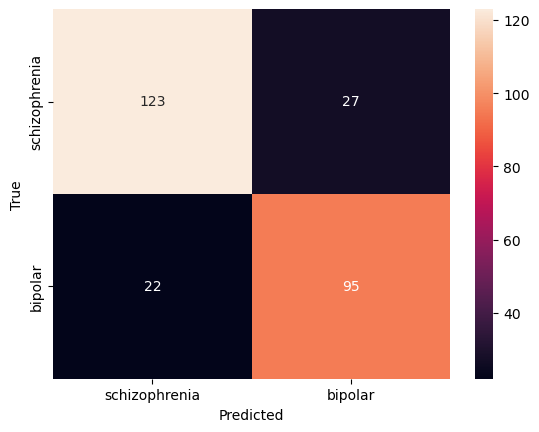

In [57]:
# Print best parameters
print("Best Parameters for Gradient Boosting:")
print(pd.Series(grid_search_gb.best_params_))
print()

# Print classification report for the best model
print("Classification Report for Best Gradient Boosting Model:")
print(classification_report(y_test, y_pred_best_gb))

# Plot confusion matrix for the best model
cm_gb_best = confusion_matrix(y_test, y_pred_best_gb)
sns.heatmap(cm_gb_best,
            annot=True,
            fmt='d', 
            xticklabels=['schizophrenia', 'bipolar'],
            yticklabels=['schizophrenia', 'bipolar'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()